In [3]:
!pip install celluloid
!pip install imgaug
!pip install tensorboard
!pip install torch
!pip intsall torchio 
!pip install torchmetrics
!pip install torchvision
!pip install tqdm
!pip install pytorch-lightning
!pip install opencv-pytorch
!pip install numpy
!pip install matplotlib
!pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "intsall" - maybe you meant "install"
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 409 kB 7.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 584 kB 7.5 MB/s 
     |███████████████████████████

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# how to work with DICOM  #

In [5]:
!pip install pydicom


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 8.1 MB/s 


In [7]:
!pip install pathlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
dicom_file =pydicom.read_file("/content/drive/MyDrive/ID_0000_AGE_0060_CONTRAST_1_CT.dcm")

In [16]:
print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

In [18]:
dicom_file[0x0028, 0x0010]

(0028, 0010) Rows                                US: 512

In [22]:
dicom_file.Rows

512

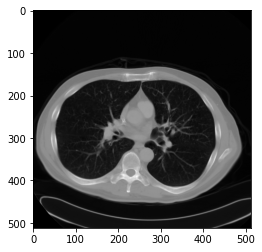

In [26]:
ct=dicom_file.pixel_array
plt.imshow(ct,cmap='gray')

In [27]:
path_to_head_mri=Path("/content/drive/MyDrive/03-Data-Formats/SE000001/")

In [28]:
all_files=list(path_to_head_mri.glob("*"))

In [29]:
all_files

[PosixPath('/content/drive/MyDrive/03-Data-Formats/SE000001/MR000002'),
 PosixPath('/content/drive/MyDrive/03-Data-Formats/SE000001/MR000001'),
 PosixPath('/content/drive/MyDrive/03-Data-Formats/SE000001/MR000004'),
 PosixPath('/content/drive/MyDrive/03-Data-Formats/SE000001/MR000003'),
 PosixPath('/content/drive/MyDrive/03-Data-Formats/SE000001/MR000008'),
 PosixPath('/content/drive/MyDrive/03-Data-Formats/SE000001/MR000011'),
 PosixPath('/content/drive/MyDrive/03-Data-Formats/SE000001/MR000006'),
 PosixPath('/content/drive/MyDrive/03-Data-Formats/SE000001/MR000005'),
 PosixPath('/content/drive/MyDrive/03-Data-Formats/SE000001/MR000000'),
 PosixPath('/content/drive/MyDrive/03-Data-Formats/SE000001/MR000016'),
 PosixPath('/content/drive/MyDrive/03-Data-Formats/SE000001/MR000014'),
 PosixPath('/content/drive/MyDrive/03-Data-Formats/SE000001/MR000009'),
 PosixPath('/content/drive/MyDrive/03-Data-Formats/SE000001/MR000007'),
 PosixPath('/content/drive/MyDrive/03-Data-Formats/SE000001/MR00

In [30]:
mri_data=[]
for path in all_files:
  data=pydicom.read_file(path)
  mri_data.append(data)


In [37]:
for slice in mri_data[:5]:
  print(slice)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 214
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413270092710
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.114089.1.0.0.3.3.38
(0002, 0013) Implementation Version Name         SH: 'DCF 3.3.38c'
(0002, 0016) Source Application Entity Title     AE: 'DCF'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008, 0012) Instance Creation Date              DA: '20150114'
(0008, 0013) Instance Creation Time              TM: '132938'
(0008, 0014) Insta

In [35]:
mri_data_ordered=sorted(mri_data , key=lambda slice :slice.SliceLocation)

In [36]:
for slice in mri_data_ordered[:5]:
  print(slice.SliceLocation)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714


In [39]:
full_volume=[]

for slice in mri_data_ordered:
  print(slice.SliceLocation)
  full_volume.append(slice.pixel_array)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714
29.9999952815023
35.9999959546749
41.9999963629367
47.9999970362677
53.9999958207213
59.9999962290673
65.9999961939969
71.9999961590453
77.9999962275740
83.9999967682912
89.9999955528687
95.9999960937442
101.999994745866
107.999995419197
113.999995959439
119.999996566542
125.999997173645
131.999997780749
137.999998321624
143.999998928727
149.999999502083
155.999992554172


In [43]:
len(full_volume)

27

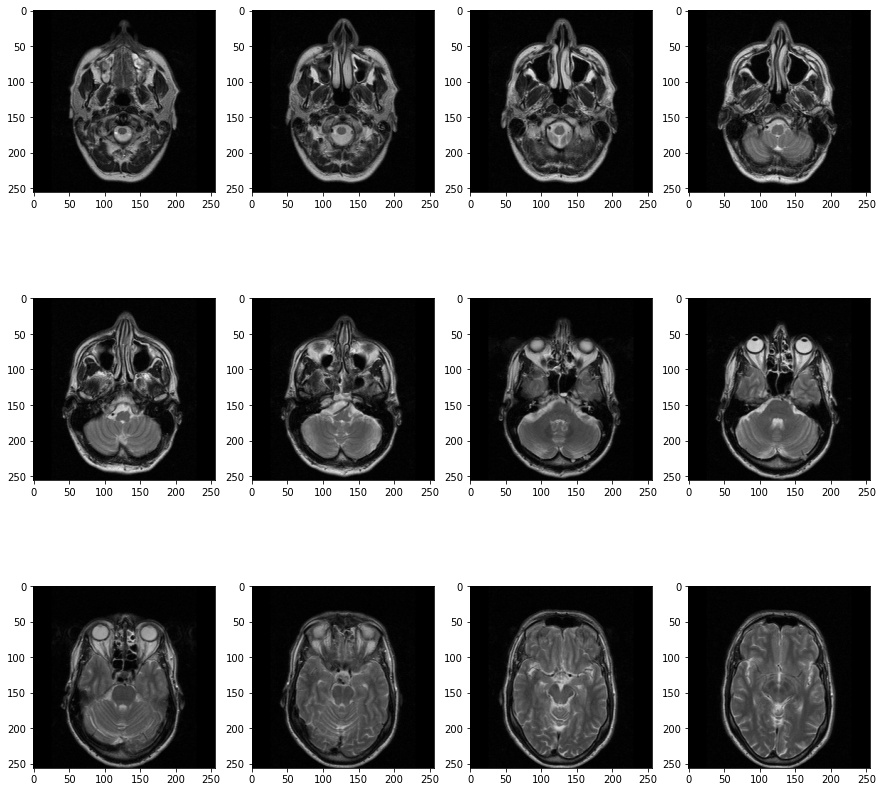

In [47]:
fig,axis=plt.subplots(3,4,figsize=(15,15))
slice_counter=0
for i in range(3):
  for j in range(4):
    axis[i][j].imshow(full_volume[slice_counter],cmap='gray')
    slice_counter+=1
    

In [48]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48.4 MB 1.5 MB/s 


In [50]:
import SimpleITK as sitk

In [52]:
series_ids=sitk.ImageSeriesReader.GetGDCMSeriesIDs( str(path_to_head_mri))
print(series_ids)

('1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413262801702',)


In [53]:
series_file_names=sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_head_mri),series_ids[0])

In [54]:
series_file_names

('/content/drive/MyDrive/03-Data-Formats/SE000001/MR000000',
 '/content/drive/MyDrive/03-Data-Formats/SE000001/MR000001',
 '/content/drive/MyDrive/03-Data-Formats/SE000001/MR000002',
 '/content/drive/MyDrive/03-Data-Formats/SE000001/MR000003',
 '/content/drive/MyDrive/03-Data-Formats/SE000001/MR000004',
 '/content/drive/MyDrive/03-Data-Formats/SE000001/MR000005',
 '/content/drive/MyDrive/03-Data-Formats/SE000001/MR000006',
 '/content/drive/MyDrive/03-Data-Formats/SE000001/MR000007',
 '/content/drive/MyDrive/03-Data-Formats/SE000001/MR000008',
 '/content/drive/MyDrive/03-Data-Formats/SE000001/MR000009',
 '/content/drive/MyDrive/03-Data-Formats/SE000001/MR000010',
 '/content/drive/MyDrive/03-Data-Formats/SE000001/MR000011',
 '/content/drive/MyDrive/03-Data-Formats/SE000001/MR000012',
 '/content/drive/MyDrive/03-Data-Formats/SE000001/MR000013',
 '/content/drive/MyDrive/03-Data-Formats/SE000001/MR000014',
 '/content/drive/MyDrive/03-Data-Formats/SE000001/MR000015',
 '/content/drive/MyDrive

In [55]:
series_reader=sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)

In [57]:
image_data=series_reader.Execute()

In [58]:
head_mri=sitk.GetArrayFromImage(image_data)

In [59]:
head_mri.shape

(27, 256, 256)

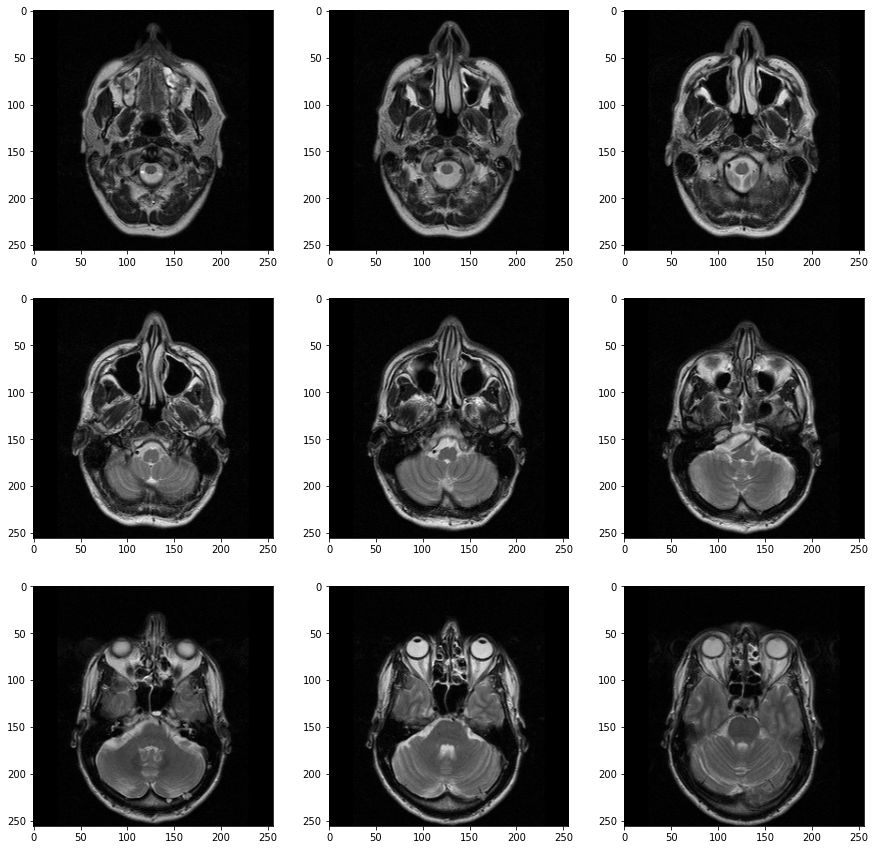

In [61]:
fig,axis=plt.subplots(3,3,figsize=(15,15))

slicing_id=0

for i in range(3):
  for j in range(3):
    axis[i][j].imshow(head_mri[slicing_id],cmap='gray')
    slicing_id+=1

In [ ]:
# how to work with DICOM  #

# how to work with NIFTI  #

In [63]:
!pip install dicom2nifti

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for dicom2nifti: filename=dicom2nifti-2.3.3-py3-none-any.whl size=44349 sha256=063ef0927df62dc69ab190be557a62b794e21f86714888b0e517a396c42ba3e5
  Stored in directory: /root/.cache/pip/wheels/c3/fa/ce/46cd4de391842020d4ee1d2de6ab58ae857384f4c05f384e75
Successfully built dicom2nifti


In [67]:
!pip install nibabel


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
import dicom2nifti
import nibabel as nib

In [70]:
path_to_dicom_file="/content/drive/MyDrive/03-Data-Formats/SE000001"

In [72]:
dicom2nifti.convert_directory(path_to_dicom_file,'/content/drive/MyDrive/03-Data-Formats/')

In [73]:
nifti=nib.load("/content/drive/MyDrive/03-Data-Formats/201_t2w_tse.nii.gz")

In [76]:
print(nifti.ndim)

3


In [81]:
nifti.header['qoffset_x']

array(115.27232, dtype=float32)

In [82]:
nifti.shape

(256, 256, 27)

In [83]:
image_array=nifti.get_fdata()

In [86]:
image_array_new=image_array.reshape(27,256,256)

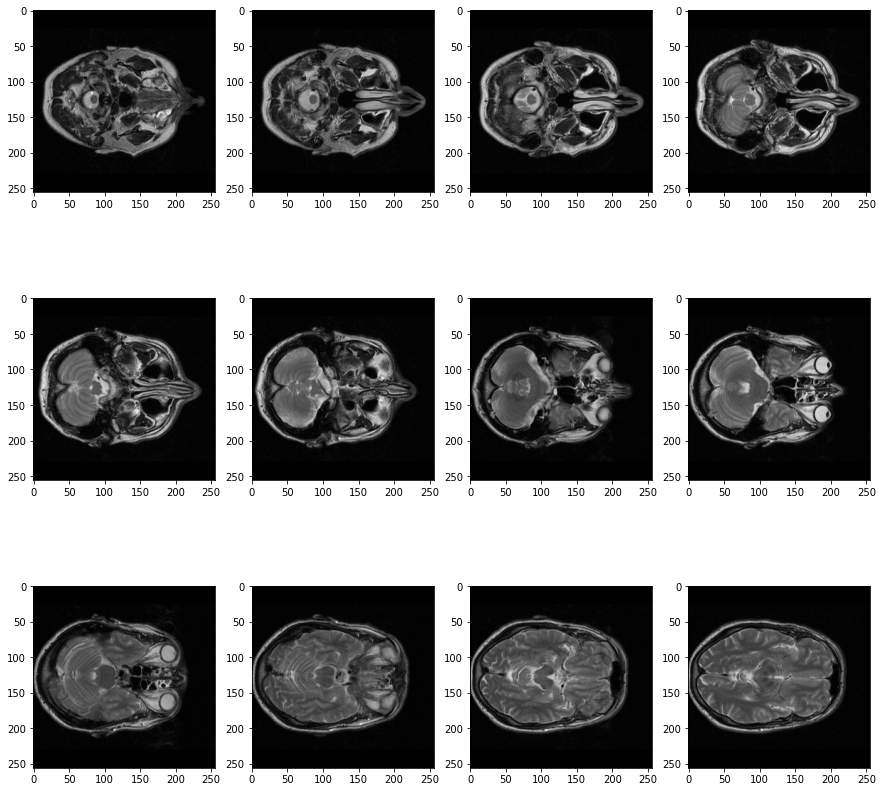

In [90]:
fig,axis=plt.subplots(3,4,figsize=(15,15))
slice_counter=0
for i in range(3):
  for j in range(4):
    axis[i][j].imshow(image_array[:,:,slice_counter],cmap='gray')
    slice_counter+=1
    

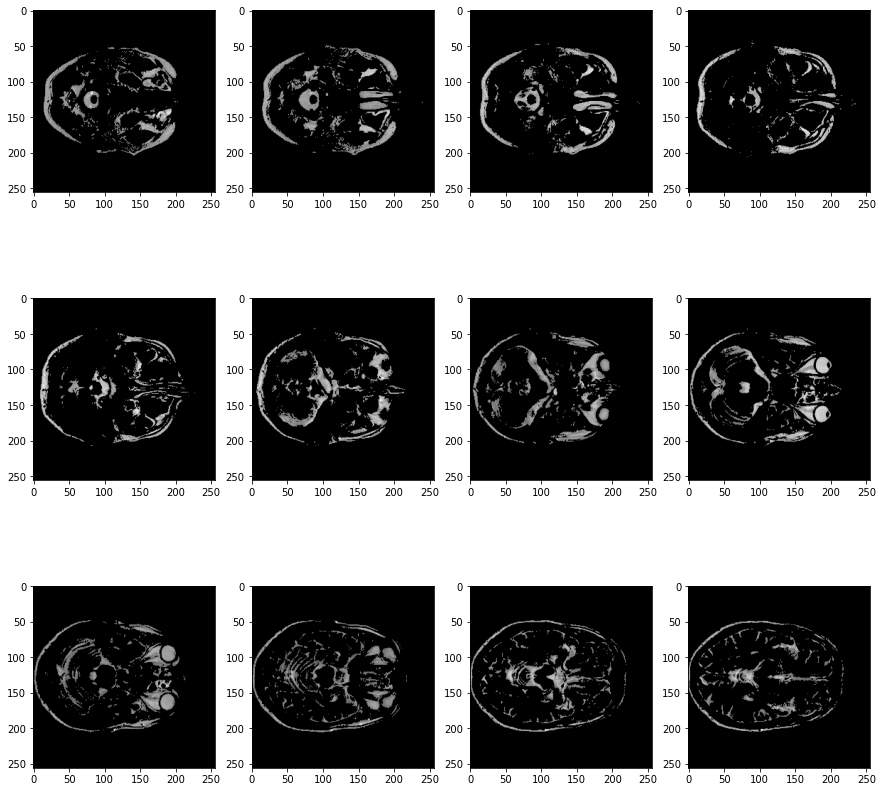

In [91]:
image_array_proccesed=image_array*(image_array>300)
fig,axis=plt.subplots(3,4,figsize=(15,15))
slice_counter=0
for i in range(3):
  for j in range(4):
    axis[i][j].imshow(image_array_proccesed[:,:,slice_counter],cmap='gray')
    slice_counter+=1
    

In [92]:
processed_nifti=nib.Nifti1Image(image_array_proccesed , nifti.affine)


In [93]:
nib.save(processed_nifti,'/content/drive/MyDrive/03-Data-Formats/201_t2w_tse.nii.gz')

In [ ]:
jhjh